# For importing libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/jupyter/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from scipy.io import mmread
from sklearn import metrics
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFE
from sklearn .model_selection import learning_curve
from collections import Counter
import pickle
import gzip
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
#plt.style.use('ggplot')
#ggplot is R based visualisation package that provides better graphics with higher level of abstraction

## for loading data

In [3]:
import pandas as pd
diabetes_data = pd.read_csv('full_dataset.csv')

In [4]:
diabetes_data.head()

,Age,Pregnancy,BMI,HbA1c,Chol,FBS,RBS,BP,CLASS
0,64,0,25.7,7.22,250,229,238,147,1
1,52,0,27.3,7.67,256,218,298,164,1
2,63,0,25.9,8.99,223,175,339,149,1
3,58,0,30.2,8.27,246,202,236,132,1
4,51,0,28.1,7.00,239,177,334,146,1


In [5]:
# now checking the shape of the dataset
print('Diabetes data shape: ', diabetes_data.shape)

Diabetes data shape:  (10655, 9)


In [6]:
diabetes_data.groupby('CLASS').size()


CLASS
1    2660
2    2661
3    2672
4    2662
dtype: int64

Text(0, 0.5, 'Number of data')

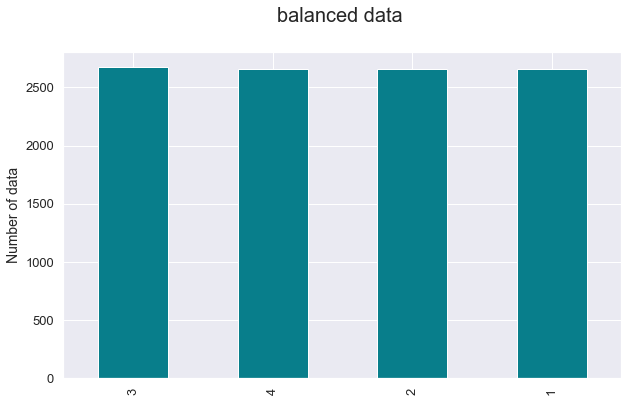

In [7]:
ax = diabetes_data['CLASS'].value_counts().plot(kind='bar', figsize=(10, 6), fontsize=13, color='#087E8B')
ax.set_title('balanced data ', size=20, pad=30)
ax.set_ylabel('Number of data', fontsize=14)

In [8]:
X = diabetes_data.drop('CLASS', axis = 1)
Y = diabetes_data.CLASS
print(X)

       Age  Pregnancy   BMI  HbA1c  Chol  FBS  RBS   BP
0       64          0  25.7   7.22   250  229  238  147
1       52          0  27.3   7.67   256  218  298  164
2       63          0  25.9   8.99   223  175  339  149
3       58          0  30.2   8.27   246  202  236  132
4       51          0  28.1   7.00   239  177  334  146
...    ...        ...   ...    ...   ...  ...  ...  ...
10650   48          0  21.3   5.20   185   79  113  117
10651   43          0  19.1   4.10   188   85   86  108
10652   40          0  21.3   4.80   126   84  119  112
10653   43          0  21.8   5.00   192   71  110  102
10654   41          0  25.0   4.10   141   82  111  118

[10655 rows x 8 columns]


In [9]:
X = diabetes_data.drop('CLASS', axis = 1)
y = diabetes_data.CLASS
print(y)

0        1
1        1
2        1
3        1
4        1
        ..
10650    4
10651    4
10652    4
10653    4
10654    4
Name: CLASS, Length: 10655, dtype: int64


<AxesSubplot:xlabel='CLASS', ylabel='count'>

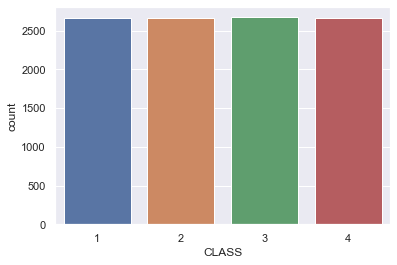

In [10]:
diabetes_data=pd.DataFrame(X)
diabetes_data["CLASS"]=y
sns.countplot(diabetes_data["CLASS"])

In [11]:
# checking for the null values of the datasets
diabetes_data.isnull().sum()

Age          0
Pregnancy    0
BMI          5
HbA1c        0
Chol         0
FBS          0
RBS          0
BP           0
CLASS        0
dtype: int64

In [12]:
updated_diabetes_data = diabetes_data
updated_diabetes_data['BMI'] = updated_diabetes_data['BMI'].fillna(updated_diabetes_data['BMI'].mean())
updated_diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10655 entries, 0 to 10654
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        10655 non-null  int64  
 1   Pregnancy  10655 non-null  int64  
 2   BMI        10655 non-null  float64
 3   HbA1c      10655 non-null  float64
 4   Chol       10655 non-null  int64  
 5   FBS        10655 non-null  int64  
 6   RBS        10655 non-null  int64  
 7   BP         10655 non-null  int64  
 8   CLASS      10655 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 749.3 KB


In [13]:
# checking for the null values of the datasets
diabetes_data.isnull().sum()

Age          0
Pregnancy    0
BMI          0
HbA1c        0
Chol         0
FBS          0
RBS          0
BP           0
CLASS        0
dtype: int64

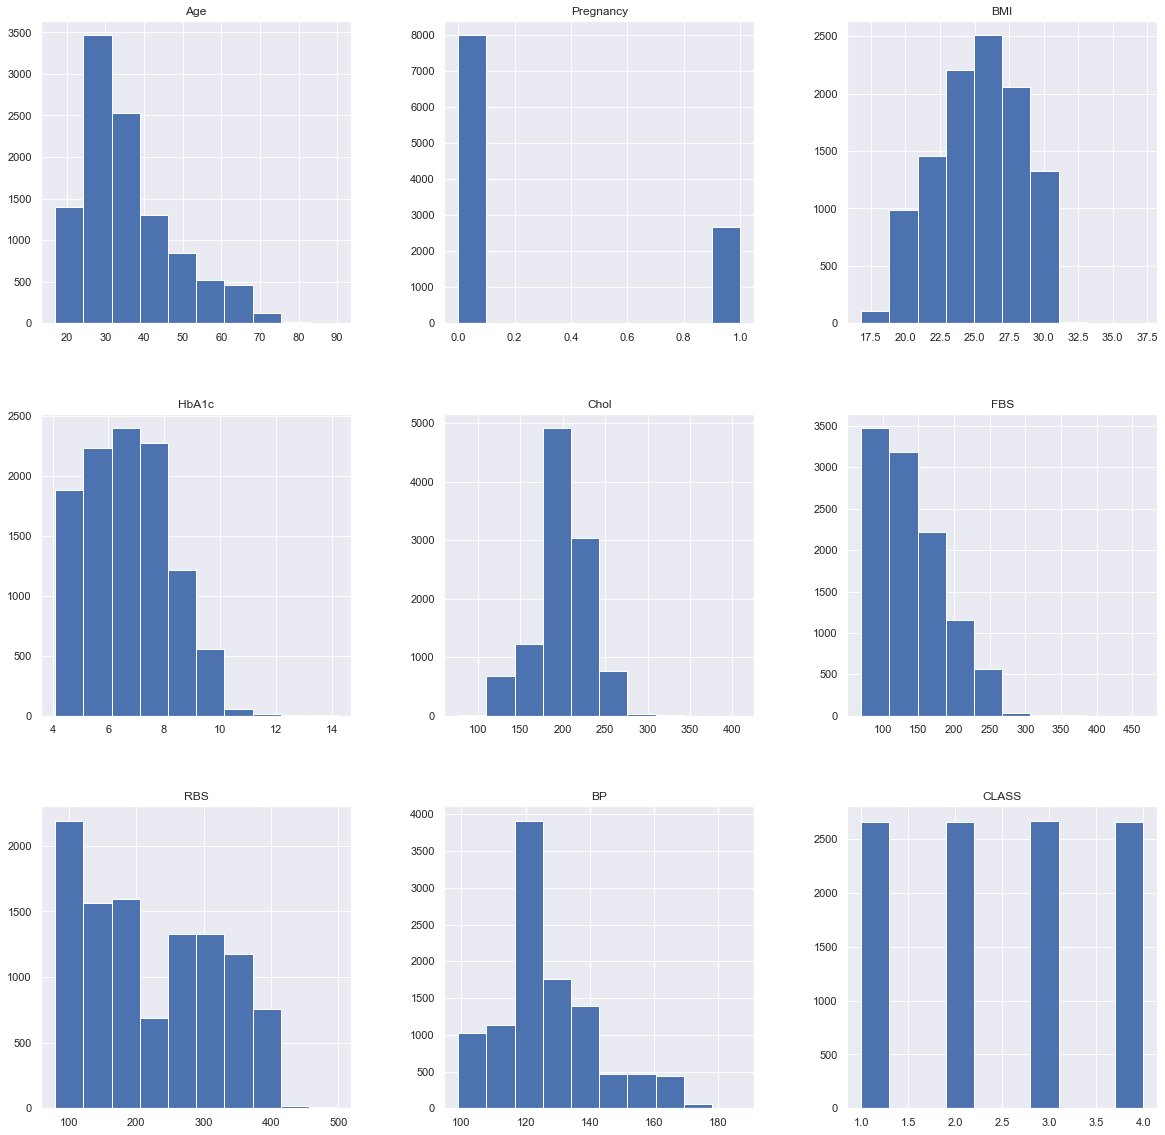

In [14]:
p = diabetes_data.hist(figsize = (20,20))

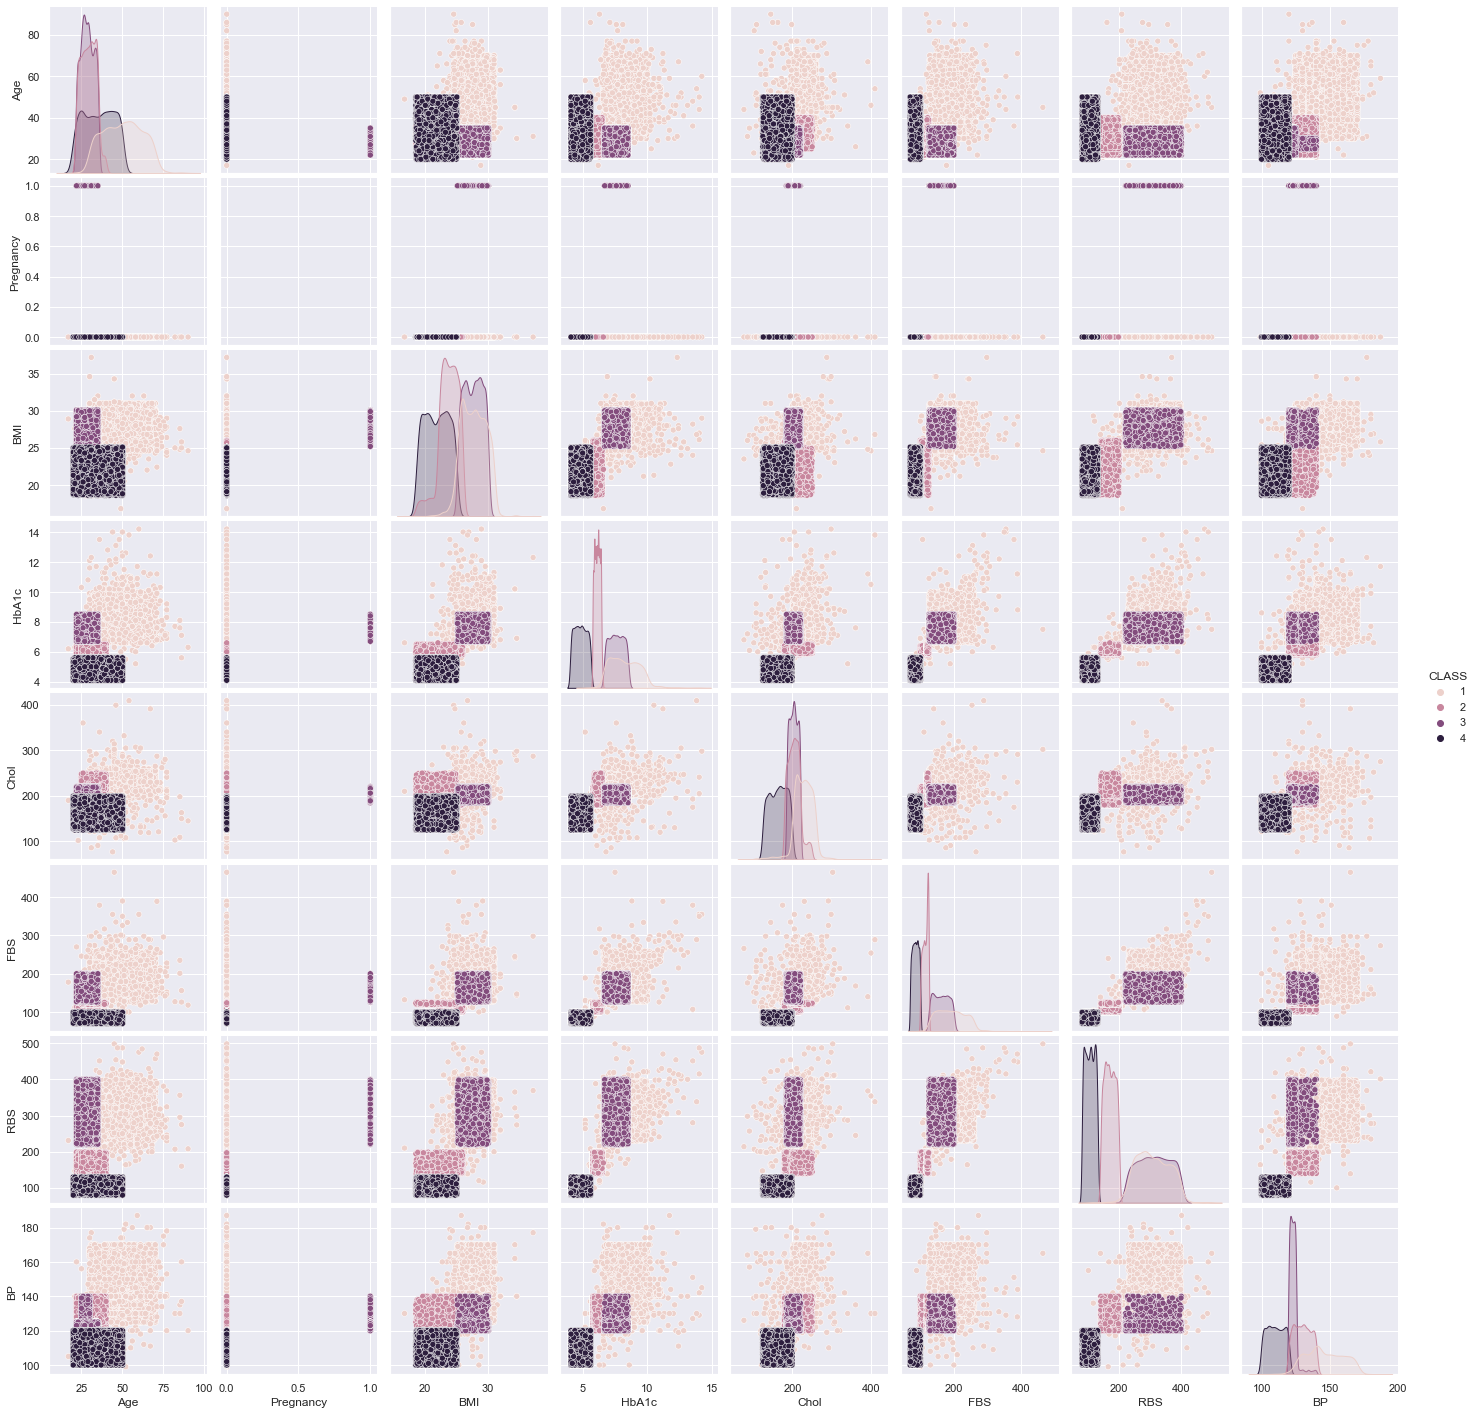

In [15]:
p=sns.pairplot(diabetes_data, hue = 'CLASS')

<AxesSubplot:xlabel='CLASS', ylabel='FBS'>

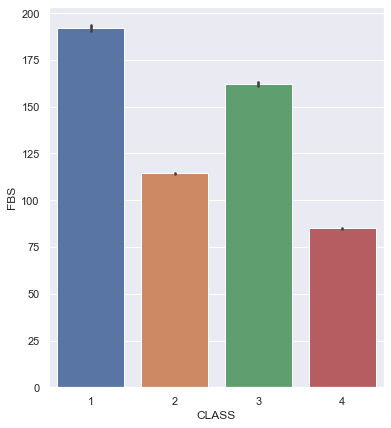

In [16]:
# now ploting bar plot for the better understanding about the dataset
plt.figure(figsize=(6,7))
sns.barplot(x = 'CLASS', y ='FBS', data = diabetes_data)

<AxesSubplot:xlabel='CLASS', ylabel='RBS'>

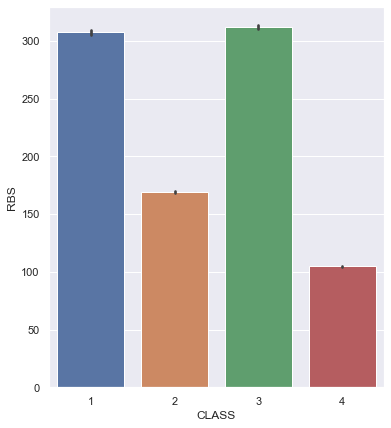

In [17]:
# lets compare other values also
plt.figure(figsize=(6,7))
sns.barplot(x = 'CLASS', y ='RBS', data = diabetes_data)

<AxesSubplot:xlabel='CLASS', ylabel='RBS'>

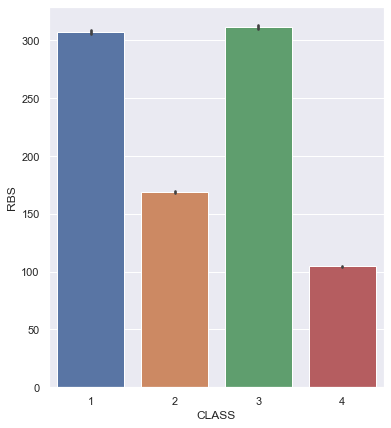

In [18]:
# lets compare other values also
plt.figure(figsize=(6,7))
sns.barplot(x = 'CLASS', y ='RBS', data = diabetes_data)

<AxesSubplot:xlabel='CLASS', ylabel='Chol'>

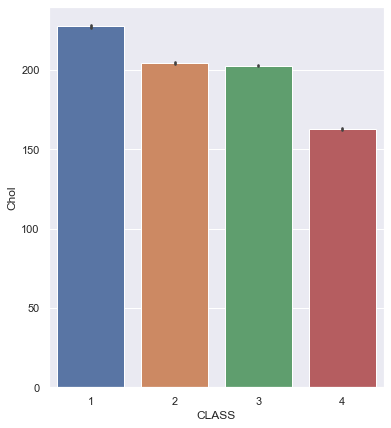

In [19]:
plt.figure(figsize=(6,7))
sns.barplot(x = 'CLASS', y ='Chol', data = diabetes_data)

<AxesSubplot:xlabel='CLASS', ylabel='BP'>

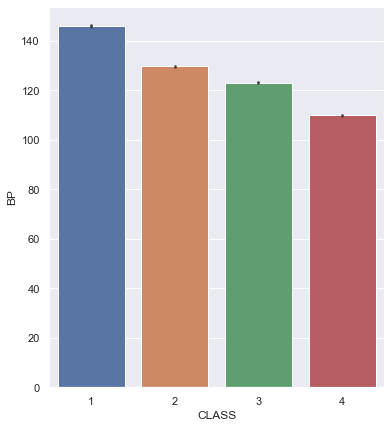

In [20]:
plt.figure(figsize=(6,7))
sns.barplot(x = 'CLASS', y ='BP', data = diabetes_data)

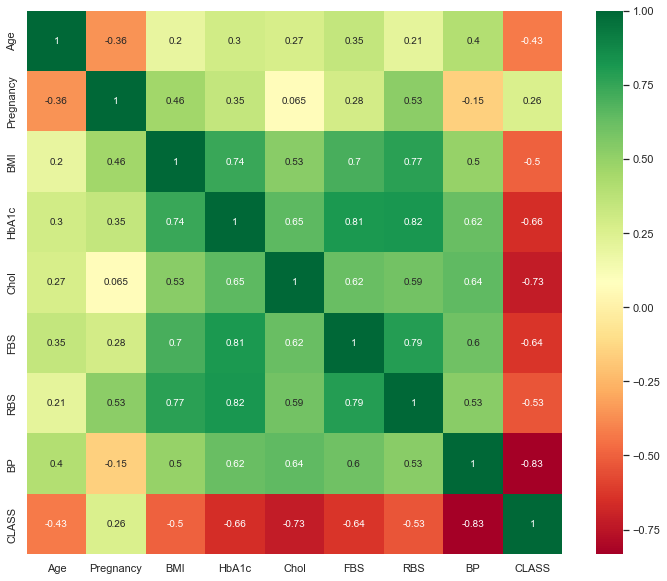

In [21]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=0)

In [23]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [24]:
X = diabetes_data.drop('CLASS', axis = 1)
y = diabetes_data.CLASS
print(y)

0        1
1        1
2        1
3        1
4        1
        ..
10650    4
10651    4
10652    4
10653    4
10654    4
Name: CLASS, Length: 10655, dtype: int64


### Building a mmodel with SVM

In [25]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear']} 
random = RandomizedSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
random.fit(X, y)
print(random)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.999 total time=   0.2s
[CV 2/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=1.000 total time=   0.1s
[CV 3/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=1.000 total time=   0.1s
[CV 4/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.999 total time=   0.1s
[CV 5/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.961 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=1.000 total time=   9.3s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=1.000 total time=   7.9s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=1.000 total time=   8.6s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.998 total time=   6.6s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.992 total time=   1.8s
[CV 1/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.737 total time=  10.6s
[CV 2/5] END .......C=10, gamma=0.1, kernel=rbf;

In [26]:
# print best parameter after tuning
print(random.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(random.best_estimator_)

{'kernel': 'linear', 'gamma': 0.1, 'C': 0.1}
SVC(C=0.1, gamma=0.1, kernel='linear')


### Crossvalidation

In [27]:
model=[]
acc=[]

In [28]:
svclassifier = SVC(C=0.1, gamma=0.0001, kernel='linear')
svclassifier.fit(X,y)

kfold = KFold(n_splits=10, random_state=0, shuffle=True)
result = cross_val_score(svclassifier, X, y, cv=kfold, scoring='accuracy')

y_predi = cross_val_predict(svclassifier, X, y, cv=kfold)
print(f'Accuracy: {result}')
print("Accuracy: %.3f%% (%.3f%%)" % (result.mean()*100.0, result.std()*100.0))
print(classification_report(y, y_predi))
model.append("SVC")
acc.append(result.mean())

Accuracy: [0.99906191 0.99906191 0.99812383 0.99812383 1.         0.99906103
 1.         0.99624413 0.99906103 1.        ]
Accuracy: 99.887% (0.109%)
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2660
           2       1.00      1.00      1.00      2661
           3       1.00      1.00      1.00      2672
           4       1.00      1.00      1.00      2662

    accuracy                           1.00     10655
   macro avg       1.00      1.00      1.00     10655
weighted avg       1.00      1.00      1.00     10655



<AxesSubplot:>

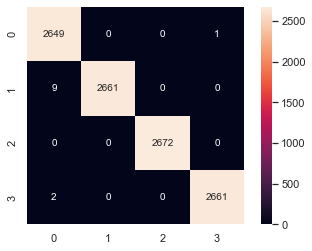

In [29]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y, y_predi)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True)


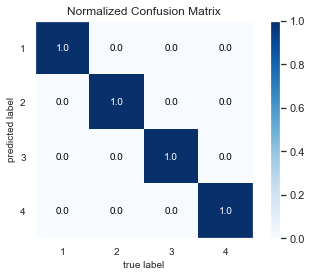

In [30]:
import matplotlib.pyplot as plt
import scikitplot as skplt
y_predi = cross_val_predict(svclassifier, X, y, cv=kfold)
skplt.metrics.plot_confusion_matrix(y_predi, y, normalize=True)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

In [31]:
kfold = KFold(n_splits=10, random_state=0, shuffle=True)
result = cross_val_score(svclassifier, X, y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (result.mean()*100.0, result.std()*100.0))

Accuracy: 99.887% (0.109%)


### svm with UFS

In [32]:
def select_features(features, target):
    # configure to select a subset of features
    fs = SelectKBest(score_func=f_classif, k=7)
    # learn relationship from training data
    fs.fit(X, y)
    # transform train input data
    X_featur_fs = fs.transform(X)
    # transform test input data
    #X_test_fs = fs.transform(features)
    return X_featur_fs, fs
X_featur_fs, fs = select_features(X, y)
svclassifier = SVC(C=0.1, gamma=0.0001, kernel='linear')
kfold = KFold(n_splits=10, random_state=0, shuffle=True)
result = cross_val_score(svclassifier, X_featur_fs, y, cv=kfold, scoring='accuracy')
y_predi = cross_val_predict(svclassifier,X_featur_fs, y, cv=kfold)
print(f'Accuracy: {result}')
print("Accuracy: %.3f%% (%.3f%%)" % (result.mean()*100.0, result.std()*100.0))
print(classification_report(y, y_predi))

Accuracy: [0.99812383 0.99812383 0.99812383 0.99812383 1.         0.99906103
 0.99812207 0.99624413 0.99906103 1.        ]
Accuracy: 99.850% (0.105%)
              precision    recall  f1-score   support

           1       1.00      0.99      1.00      2660
           2       1.00      1.00      1.00      2661
           3       1.00      1.00      1.00      2672
           4       1.00      1.00      1.00      2662

    accuracy                           1.00     10655
   macro avg       1.00      1.00      1.00     10655
weighted avg       1.00      1.00      1.00     10655



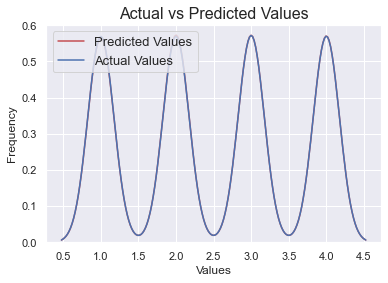

In [33]:
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style
sb.distplot(y_predi, hist = False, color = 'r', label = 'Predicted Values')
sb.distplot(y, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)

### SVC learning curve

In [34]:
train_sizes, train_scores, test_scores=learning_curve(SVC(),X,  y, cv = 10, scoring ='accuracy', n_jobs=-1, train_sizes = np.linspace(0.01,1, 50), verbose =1 )

[learning_curve] Training set sizes: [  95  289  483  677  870 1064 1258 1452 1645 1839 2033 2226 2420 2614
 2808 3001 3195 3389 3583 3776 3970 4164 4358 4551 4745 4939 5133 5326
 5520 5714 5907 6101 6295 6489 6682 6876 7070 7264 7457 7651 7845 8039
 8232 8426 8620 8814 9007 9201 9395 9589]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  3.2min finished


In [35]:
train_mean = np.mean(train_scores, axis =1)
train_mean

array([       nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan, 0.99020661, 0.99514155, 0.99433761,
       0.99373542, 0.99411581, 0.99436412, 0.99455763, 0.99480932,
       0.99501259, 0.99522094, 0.99543369, 0.99564931, 0.99572181,
       0.9749342 , 0.98860316, 0.98711979, 0.98697464, 0.98697935,
       0.98647368, 0.98639567, 0.98600477, 0.98583757, 0.98594732,
       0.98510762, 0.98479491, 0.98492566, 0.98540968, 0.98579271,
       0.98613129, 0.98654061, 0.98688047, 0.98712319, 0.987529  ,
       0.9879283 , 0.98825358, 0.98854472, 0.98883449, 0.98908124])

In [36]:
test_mean = np.mean(test_scores, axis =1)
test_mean

array([       nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan, 0.269742  , 0.49704261, 0.49666702,
       0.49657312, 0.49638533, 0.49638533, 0.49629143, 0.49629143,
       0.49629143, 0.49629143, 0.49638533, 0.49629143, 0.49657312,
       0.55954875, 0.7296999 , 0.73795973, 0.73871046, 0.73852276,
       0.73842912, 0.73814761, 0.73777238, 0.73758476, 0.73730324,
       0.73683402, 0.73608329, 0.98178932, 0.9854498 , 0.9856375 ,
       0.9857314 , 0.98582521, 0.98582521, 0.98582521, 0.9859191 ,
       0.98591902, 0.98601291, 0.98601291, 0.98601291, 0.98601291])

In [37]:
test_mean = np.mean(test_scores, axis =1)
test_mean

array([       nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan, 0.269742  , 0.49704261, 0.49666702,
       0.49657312, 0.49638533, 0.49638533, 0.49629143, 0.49629143,
       0.49629143, 0.49629143, 0.49638533, 0.49629143, 0.49657312,
       0.55954875, 0.7296999 , 0.73795973, 0.73871046, 0.73852276,
       0.73842912, 0.73814761, 0.73777238, 0.73758476, 0.73730324,
       0.73683402, 0.73608329, 0.98178932, 0.9854498 , 0.9856375 ,
       0.9857314 , 0.98582521, 0.98582521, 0.98582521, 0.9859191 ,
       0.98591902, 0.98601291, 0.98601291, 0.98601291, 0.98601291])

In [38]:
test_std = np.std(test_scores, axis=1)
test_std

array([       nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan, 0.05351615, 0.00560274, 0.0062372 ,
       0.00650566, 0.00704567, 0.00704567, 0.007317  , 0.007317  ,
       0.007317  , 0.007317  , 0.00704567, 0.007317  , 0.0062991 ,
       0.0152515 , 0.01892463, 0.01899543, 0.01929752, 0.0193295 ,
       0.01860073, 0.01857147, 0.01846541, 0.01863536, 0.01864549,
       0.01855369, 0.01883377, 0.01919064, 0.01885197, 0.01883698,
       0.0187983 , 0.01882946, 0.01882946, 0.01882946, 0.01855849,
       0.01885543, 0.01858436, 0.01858436, 0.01858436, 0.01858436])

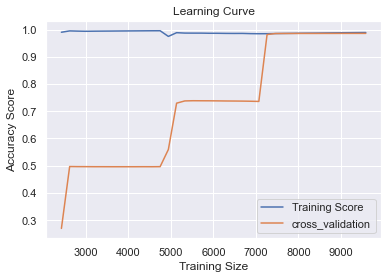

In [39]:
plt.plot(train_sizes, train_mean, label = 'Training Score')
plt.plot(train_sizes, test_mean,label = 'cross_validation')
#plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, color= '#DDDDDD')
#plt.fill_between(train_sizes, test_mean-test_std, test_mean+test_std, color= '#DDDDDD')

plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
plt.title('Learning Curve')
plt.legend(loc = 'best')

In [40]:
final_model = svclassifier.fit (X, y)
new_data=[[64,0,25.7,7.22,250,229,238,147]]
new_ne=final_model.predict(new_data)
print(new_ne)

[1]


In [41]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(SVC.score(X_train, y_train)))

print('cross_validation: {:.4f}'.format(SVC.score(X_test, y_test)))

TypeError: score() missing 1 required positional argument: 'y'

### Naïve Bayes


In [42]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train, y_train)


GaussianNB()

### cross validation

In [43]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X,y)

kfold = KFold(n_splits=10, random_state=0, shuffle=True)
result = cross_val_score(gnb, X, y, cv=kfold, scoring='accuracy')
y_predinb = cross_val_predict(gnb, X, y, cv=kfold)
print(f'Accuracy: {result}')
print("Accuracy: %.3f%% (%.3f%%)" % (result.mean()*100.0, result.std()*100.0))
print(classification_report(y, y_predinb))
model.append("GaussianNB")
acc.append(result)

Accuracy: [1.         0.99812383 0.99812383 0.99906191 1.         0.99906103
 1.         0.99812207 0.99906103 1.        ]
Accuracy: 99.916% (0.078%)
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2660
           2       1.00      1.00      1.00      2661
           3       1.00      1.00      1.00      2672
           4       1.00      1.00      1.00      2662

    accuracy                           1.00     10655
   macro avg       1.00      1.00      1.00     10655
weighted avg       1.00      1.00      1.00     10655



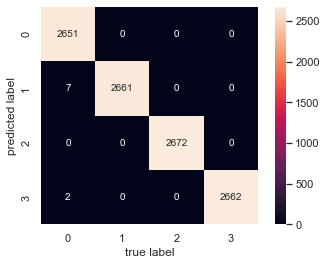

In [44]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y, y_predinb)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True)

plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

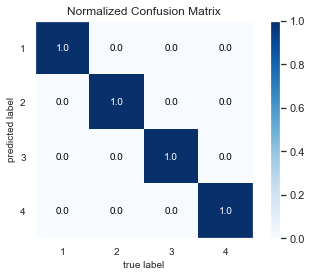

In [45]:
import matplotlib.pyplot as plt
import scikitplot as skplt
y_predinb = cross_val_predict(gnb, X, y, cv=kfold)
skplt.metrics.plot_confusion_matrix(y_predinb, y, normalize=True)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

### Naïve Bayes with UFS

In [46]:
def select_features(features, target):
    # configure to select a subset of features
    fs = SelectKBest(score_func=f_classif, k=8)
    # learn relationship from training data
    fs.fit(X, y)
    # transform train input data
    X_featur_fs = fs.transform(X)
    # transform test input data
    #X_test_fs = fs.transform(features)
    return X_featur_fs, fs
X_featur_fs, fs = select_features(X, y)
gnb = GaussianNB()
kfold = KFold(n_splits=10, random_state=42, shuffle=True)
result = cross_val_score(gnb, X_featur_fs, y, cv=kfold, scoring='accuracy')
y_predi = cross_val_predict(gnb,X_featur_fs, y, cv=kfold)
print(f'Accuracy: {result}')
print("Accuracy: %.3f%% (%.3f%%)" % (result.mean()*100.0, result.std()*100.0))
print(classification_report(y, y_predi))

Accuracy: [0.99718574 0.99906191 0.99906191 0.99906191 0.99906191 0.99906103
 1.         1.         1.         0.99906103]
Accuracy: 99.916% (0.078%)
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2660
           2       1.00      1.00      1.00      2661
           3       1.00      1.00      1.00      2672
           4       1.00      1.00      1.00      2662

    accuracy                           1.00     10655
   macro avg       1.00      1.00      1.00     10655
weighted avg       1.00      1.00      1.00     10655



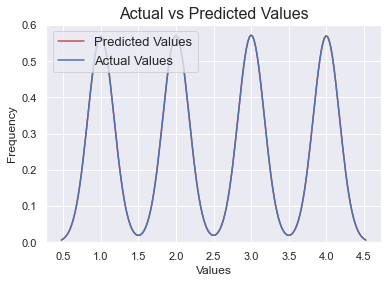

In [47]:
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style
sb.distplot(y_predinb, hist = False, color = 'r', label = 'Predicted Values')
sb.distplot(y, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)

### Naïve Bayes learning curve

In [48]:
train_sizes, train_scores, test_scores=learning_curve(GaussianNB(),X,  y, cv = 10, scoring ='accuracy', n_jobs=-1, train_sizes = np.linspace(0.01,1, 50), verbose =1 )

[learning_curve] Training set sizes: [  95  289  483  677  870 1064 1258 1452 1645 1839 2033 2226 2420 2614
 2808 3001 3195 3389 3583 3776 3970 4164 4358 4551 4745 4939 5133 5326
 5520 5714 5907 6101 6295 6489 6682 6876 7070 7264 7457 7651 7845 8039
 8232 8426 8620 8814 9007 9201 9395 9589]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   27.9s finished


In [49]:
train_mean = np.mean(train_scores, axis =1)
train_mean

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.99983471, 0.99954093, 0.99935897,
       0.99953349, 0.99940532, 0.99946887, 0.99946972, 0.99944386,
       0.99947103, 0.99939962, 0.99933456, 0.99901121, 0.99877766,
       0.99874469, 0.99879213, 0.9988359 , 0.99887681, 0.99891495,
       0.9989504 , 0.99898377, 0.99901509, 0.99904454, 0.99907213,
       0.99909831, 0.99912306, 0.99889868, 0.99892718, 0.99895439,
       0.99898024, 0.99900485, 0.99902818, 0.99905056, 0.99907193,
       0.99909235, 0.9991118 , 0.99913053, 0.99914848, 0.99916571])

In [50]:
test_mean = np.mean(test_scores, axis =1)
test_mean

array([0.24964811, 0.24964811, 0.24964811, 0.24964811, 0.24964811,
       0.24964811, 0.24964811, 0.24964811, 0.24964811, 0.24964811,
       0.24964811, 0.24964811, 0.49910833, 0.49901444, 0.49892054,
       0.49892054, 0.49882664, 0.49882664, 0.49882664, 0.49882664,
       0.49873275, 0.49873275, 0.49873275, 0.49873275, 0.49854495,
       0.7493192 , 0.7493192 , 0.7493192 , 0.7493192 , 0.7493192 ,
       0.7493192 , 0.7493192 , 0.7493192 , 0.7493192 , 0.7493192 ,
       0.7493192 , 0.7493192 , 0.99896714, 0.99896714, 0.99896714,
       0.99896714, 0.99896714, 0.99896714, 0.99896714, 0.99896714,
       0.99896714, 0.99896714, 0.99896714, 0.99896714, 0.99896714])

In [51]:
test_mean = np.mean(test_scores, axis =1)
test_mean

array([0.24964811, 0.24964811, 0.24964811, 0.24964811, 0.24964811,
       0.24964811, 0.24964811, 0.24964811, 0.24964811, 0.24964811,
       0.24964811, 0.24964811, 0.49910833, 0.49901444, 0.49892054,
       0.49892054, 0.49882664, 0.49882664, 0.49882664, 0.49882664,
       0.49873275, 0.49873275, 0.49873275, 0.49873275, 0.49854495,
       0.7493192 , 0.7493192 , 0.7493192 , 0.7493192 , 0.7493192 ,
       0.7493192 , 0.7493192 , 0.7493192 , 0.7493192 , 0.7493192 ,
       0.7493192 , 0.7493192 , 0.99896714, 0.99896714, 0.99896714,
       0.99896714, 0.99896714, 0.99896714, 0.99896714, 0.99896714,
       0.99896714, 0.99896714, 0.99896714, 0.99896714, 0.99896714])

In [52]:
test_std = np.std(test_scores, axis=1)
test_std

array([0.00011715, 0.00011715, 0.00011715, 0.00011715, 0.00011715,
       0.00011715, 0.00011715, 0.00011715, 0.00011715, 0.00011715,
       0.00011715, 0.00011715, 0.0006103 , 0.00111991, 0.00139354,
       0.00139354, 0.00138085, 0.00138085, 0.00138085, 0.00138085,
       0.00165396, 0.00165396, 0.00165396, 0.00165396, 0.00195226,
       0.00198749, 0.00198749, 0.00198749, 0.00198749, 0.00198749,
       0.00198749, 0.00198749, 0.00198749, 0.00198749, 0.00198749,
       0.00198749, 0.00198749, 0.00253521, 0.00253521, 0.00253521,
       0.00253521, 0.00253521, 0.00253521, 0.00253521, 0.00253521,
       0.00253521, 0.00253521, 0.00253521, 0.00253521, 0.00253521])

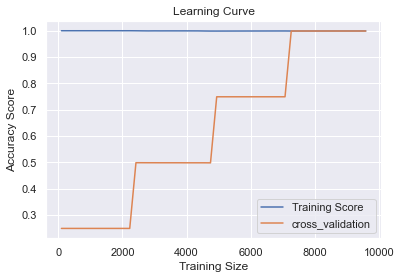

In [53]:
plt.plot(train_sizes, train_mean, label = 'Training Score')
plt.plot(train_sizes, test_mean,label = 'cross_validation')

#plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, color= '#DDDDDD')
#plt.fill_between(train_sizes, test_mean-test_std, test_mean+test_std, color= '#DDDDDD')

plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
plt.title('Learning Curve')
plt.legend(loc = 'best')

In [54]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))

print('cross_validation: {:.4f}'.format(gnb.score(X_test, y_test)))

NotFittedError: This GaussianNB instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

### Decision Tree

In [94]:
clf = DecisionTreeClassifier()
hyperparameter_space = {'max_depth':[2,3,4,6,8,10,12,15,20], 
                        'min_samples_leaf':[1,2,4,6,8,10,20,30],
                        'min_samples_split':[1,2,3,4,5,6,8,10]}

from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(clf, param_distributions=hyperparameter_space,
                        n_iter=10, scoring="accuracy", random_state=0,
                        n_jobs=-1, cv=10, return_train_score=True)

rs.fit(X, y)
print("Optimal hyperparameter combination:", rs.best_params_)

Optimal hyperparameter combination: {'min_samples_split': 8, 'min_samples_leaf': 4, 'max_depth': 20}


In [95]:
rs.best_estimator_

DecisionTreeClassifier(max_depth=20, min_samples_leaf=4, min_samples_split=8)

### Cross validation

In [56]:
clf = DecisionTreeClassifier(max_depth=20, min_samples_leaf=4, min_samples_split=8)
clf.fit(X,y)
kfold = KFold(n_splits=10, random_state=0, shuffle=True)
result = cross_val_score(clf, X, y, cv=kfold, scoring='accuracy')
y_predid = cross_val_predict(clf, X, y, cv=kfold)
print(f'Accuracy: {result}')
print("Accuracy: %.3f%% (%.3f%%)" % (result.mean()*100.0, result.std()*100.0))
print(classification_report(y, y_predid))
model.append("DTC")
acc.append(result.mean())

Accuracy: [1.         0.99812383 0.99718574 0.99812383 1.         0.99906103
 0.99812207 0.99906103 1.         1.        ]
Accuracy: 99.897% (0.098%)
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2660
           2       1.00      1.00      1.00      2661
           3       1.00      1.00      1.00      2672
           4       1.00      1.00      1.00      2662

    accuracy                           1.00     10655
   macro avg       1.00      1.00      1.00     10655
weighted avg       1.00      1.00      1.00     10655



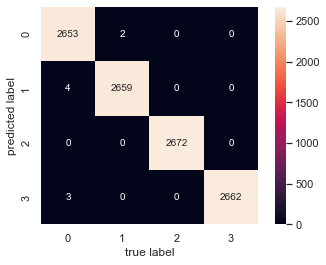

In [99]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y, y_predid)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True)

plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

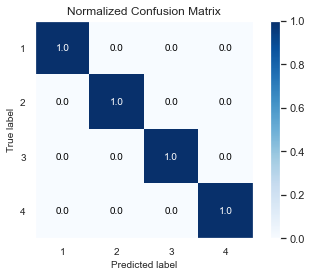

In [100]:
import matplotlib.pyplot as plt
import scikitplot as skplt
y_predid = cross_val_predict(clf, X, y, cv=kfold)
skplt.metrics.plot_confusion_matrix(y_predid, y, normalize=True)
plt.show()

### Feature importanace

Feature: 0, Score: 0.00100
Feature: 1, Score: 0.33402
Feature: 2, Score: 0.00023
Feature: 3, Score: 0.00399
Feature: 4, Score: 0.00050
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.66026
Feature: 7, Score: 0.00000


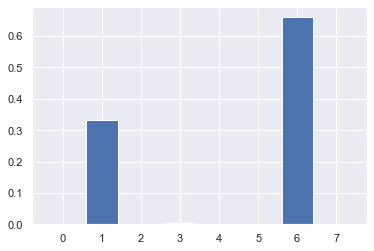

In [101]:
clf.fit(X, y)
importance = clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### decision tree with UFS

In [102]:
def select_features(features, target):
    # configure to select a subset of features
    fs = SelectKBest(score_func=f_classif, k=8)
    # learn relationship from training data
    fs.fit(X, y)
    # transform train input data
    X_featur_fs = fs.transform(X)
    # transform test input data
    #X_test_fs = fs.transform(features)
    return X_featur_fs, fs
X_featur_fs, fs = select_features(X, y)
clf = DecisionTreeClassifier(max_depth=20, min_samples_leaf=4, min_samples_split=8)
kfold = KFold(n_splits=10, random_state=0, shuffle=True)
result = cross_val_score(clf, X_featur_fs, y, cv=kfold, scoring='accuracy')
y_predi = cross_val_predict(clf,X_featur_fs, y, cv=kfold)
print(f'Accuracy: {result}')
print("Accuracy: %.3f%% (%.3f%%)" % (result.mean()*100.0, result.std()*100.0))
print(classification_report(y, y_predi))

Accuracy: [1.         0.99812383 0.99812383 0.99812383 1.         0.99906103
 0.99812207 0.99906103 1.         1.        ]
Accuracy: 99.906% (0.084%)
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2660
           2       1.00      1.00      1.00      2661
           3       1.00      1.00      1.00      2672
           4       1.00      1.00      1.00      2662

    accuracy                           1.00     10655
   macro avg       1.00      1.00      1.00     10655
weighted avg       1.00      1.00      1.00     10655



### test with unseen data

In [62]:
clf.fit(X, y)
new=[[64,0,25.7,7.22,250,229,238,147]]
new_ne=clf.predict(new)
print(new_ne)

[1]


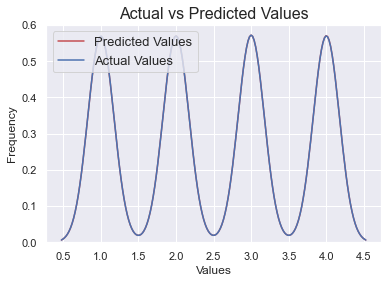

In [63]:
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style
sb.distplot(y_predid, hist = False, color = 'r', label = 'Predicted Values')
sb.distplot(y, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)

### learning curve for DT

In [64]:
train_sizes, train_scores, test_scores=learning_curve(DecisionTreeClassifier(),X,  y, cv = 10, scoring ='accuracy', n_jobs=-1, train_sizes = np.linspace(0.01,1, 50), verbose =1 )

[learning_curve] Training set sizes: [  95  289  483  677  870 1064 1258 1452 1645 1839 2033 2226 2420 2614
 2808 3001 3195 3389 3583 3776 3970 4164 4358 4551 4745 4939 5133 5326
 5520 5714 5907 6101 6295 6489 6682 6876 7070 7264 7457 7651 7845 8039
 8232 8426 8620 8814 9007 9201 9395 9589]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    5.2s finished


In [65]:
train_mean = np.mean(train_scores, axis =1)
train_mean

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [66]:
test_mean = np.mean(test_scores, axis =1)
test_mean

array([0.24964811, 0.24964811, 0.24964811, 0.24964811, 0.24964811,
       0.24964811, 0.24964811, 0.24964811, 0.24964811, 0.24964811,
       0.24964811, 0.24964811, 0.48099296, 0.49356843, 0.49356843,
       0.49356843, 0.49356843, 0.49356843, 0.49356843, 0.49356843,
       0.49356843, 0.49356843, 0.49356843, 0.49704261, 0.49694871,
       0.74753517, 0.74772296, 0.74753517, 0.74772296, 0.74753517,
       0.74781686, 0.74744127, 0.74753517, 0.74772296, 0.74753517,
       0.74762906, 0.74753517, 0.99737089, 0.99737089, 0.99737089,
       0.99737089, 0.99737089, 0.99737089, 0.99737089, 0.99737089,
       0.99737089, 0.99737089, 0.99737089, 0.99737089, 0.99699531])

In [67]:
train_std = np.std(train_scores, axis=1)
train_std

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [68]:
test_std = np.std(test_scores, axis=1)
test_std

array([0.00011715, 0.00011715, 0.00011715, 0.00011715, 0.00011715,
       0.00011715, 0.00011715, 0.00011715, 0.00011715, 0.00011715,
       0.00011715, 0.00011715, 0.00918603, 0.01114198, 0.01114198,
       0.01114198, 0.01114198, 0.01114198, 0.01114198, 0.01114198,
       0.01114198, 0.01114198, 0.01114198, 0.00669268, 0.00667685,
       0.00670985, 0.00670393, 0.00670985, 0.00670393, 0.00670985,
       0.00671871, 0.00673051, 0.00670985, 0.00670393, 0.00670985,
       0.00670097, 0.00670985, 0.00672919, 0.00672919, 0.00672919,
       0.00672919, 0.00672919, 0.00672919, 0.00672919, 0.00672919,
       0.00672919, 0.00672919, 0.00672919, 0.00672919, 0.00784248])

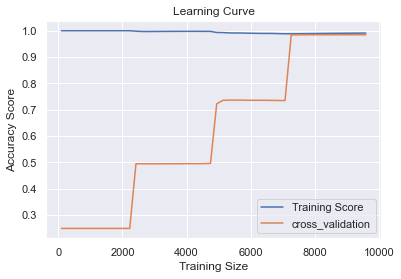

In [103]:
plt.plot(train_sizes, train_mean, label = 'Training Score')
plt.plot(train_sizes, test_mean,label = 'cross_validation')

#plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, color= '#DDDDDD')
#plt.fill_between(train_sizes, test_mean-test_std, test_mean+test_std, color= '#DDDDDD')

plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
plt.title('Learning Curve')
plt.legend(loc = 'best')

In [70]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))

print('cross_validation: {:.4f}'.format(clf.score(X_test, y_test)))

ValueError: X has 9 features, but DecisionTreeClassifier is expecting 8 features as input.

### KNN

In [71]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)
param_grid={
            'n_neighbors': [1,21,2], 
            'metric':[ 'minkowski','euclidean','manhattan'],
            'weights' : ['uniform','distance']
    
            
}
random = RandomizedSearchCV(KNeighborsClassifier(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
random.fit(X, y)
print(random)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.991 total time=   0.1s
[CV 2/5] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.993 total time=   0.0s
[CV 3/5] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.993 total time=   0.0s
[CV 4/5] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.988 total time=   0.0s
[CV 5/5] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.951 total time=   0.0s
[CV 1/5] END metric=manhattan, n_neighbors=2, weights=uniform;, score=0.993 total time=   0.0s
[CV 2/5] END metric=manhattan, n_neighbors=2, weights=uniform;, score=0.995 total time=   0.0s
[CV 3/5] END metric=manhattan, n_neighbors=2, weights=uniform;, score=0.995 total time=   0.0s
[CV 4/5] END metric=manhattan, n_neighbors=2, weights=uniform;, score=0.991 total time=   0.0s
[CV 5/5] END metric=manhattan, n_neighbors=2, weights=uniform;, score=0.969 total ti

In [72]:
# print best parameter after tuning
print(random.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(random.best_estimator_)

{'weights': 'uniform', 'n_neighbors': 2, 'metric': 'manhattan'}
KNeighborsClassifier(metric='manhattan', n_neighbors=2)


### cross validation for KNN

In [73]:
knn_classifier = KNeighborsClassifier(metric='manhattan', n_neighbors=2, weights='distance')
knn_classifier.fit(X,y)

kfold = KFold(n_splits=10, random_state=0, shuffle=True)
result = cross_val_score(knn_classifier, X, y, cv=kfold, scoring='accuracy')

y_predi = cross_val_predict(knn_classifier, X, y, cv=kfold)
print(f'Accuracy: {result}')
print("Accuracy: %.3f%% (%.3f%%)" % (result.mean()*100.0, result.std()*100.0))
print(classification_report(y, y_predi))
model.append("KNeighborsClassifier")
acc.append(result.mean())

Accuracy: [0.98968105 0.98874296 0.99155722 0.98968105 0.9934334  0.99624413
 0.9915493  0.98873239 0.98873239 0.98591549]
Accuracy: 99.043% (0.275%)
              precision    recall  f1-score   support

           1       1.00      0.96      0.98      2660
           2       1.00      1.00      1.00      2661
           3       0.97      1.00      0.98      2672
           4       1.00      1.00      1.00      2662

    accuracy                           0.99     10655
   macro avg       0.99      0.99      0.99     10655
weighted avg       0.99      0.99      0.99     10655



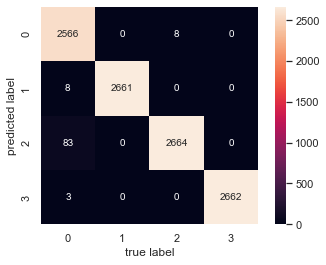

In [74]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y, y_predi)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True)

plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

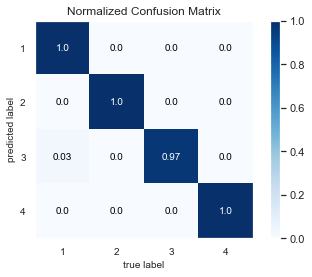

In [75]:
import matplotlib.pyplot as plt
import scikitplot as skplt
y_predi = cross_val_predict(knn_classifier, X, y, cv=kfold)
skplt.metrics.plot_confusion_matrix(y_predi, y, normalize=True)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

In [76]:
kfold = KFold(n_splits=10, random_state=0, shuffle=True)
result = cross_val_score(knn_classifier, X, y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (result.mean()*100.0, result.std()*100.0))

Accuracy: 99.043% (0.275%)


### KNN with UFS

In [77]:
def select_features(features, target):
    # configure to select a subset of features
    fs = SelectKBest(score_func=f_classif, k=6)
    # learn relationship from training data
    fs.fit(X, y)
    # transform train input data
    X_featur_fs = fs.transform(X)
    # transform test input data
    #X_test_fs = fs.transform(features)
    return X_featur_fs, fs
X_featur_fs, fs = select_features(X, y)
knn_classifier = KNeighborsClassifier(metric='euclidean', n_neighbors=21, weights='distance')
kfold = KFold(n_splits=10, random_state=0, shuffle=True)
result = cross_val_score(knn_classifier, X_featur_fs, y, cv=kfold, scoring='accuracy')
y_predi = cross_val_predict(knn_classifier,X_featur_fs, y, cv=kfold)
print(f'Accuracy: {result}')
print("Accuracy: %.3f%% (%.3f%%)" % (result.mean()*100.0, result.std()*100.0))
print(classification_report(y, y_predi))

Accuracy: [0.95684803 0.95778612 0.96060038 0.96716698 0.96153846 0.96525822
 0.95305164 0.95399061 0.95399061 0.96619718]
Accuracy: 95.964% (0.504%)
              precision    recall  f1-score   support

           1       0.97      0.87      0.91      2660
           2       0.99      1.00      1.00      2661
           3       0.89      0.97      0.93      2672
           4       1.00      1.00      1.00      2662

    accuracy                           0.96     10655
   macro avg       0.96      0.96      0.96     10655
weighted avg       0.96      0.96      0.96     10655



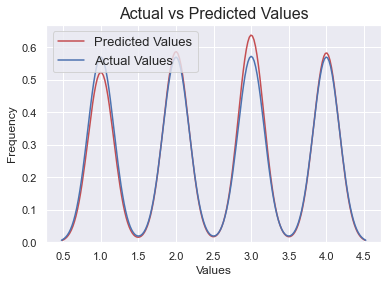

In [78]:
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style
sb.distplot(y_predi, hist = False, color = 'r', label = 'Predicted Values')
sb.distplot(y, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)

### KNN learning curve

In [79]:
train_sizes, train_scores, test_scores=learning_curve(KNeighborsClassifier(),X,  y, cv = 10, scoring ='accuracy', n_jobs=-1, train_sizes = np.linspace(0.01,1, 50), verbose =1 )

[learning_curve] Training set sizes: [  95  289  483  677  870 1064 1258 1452 1645 1839 2033 2226 2420 2614
 2808 3001 3195 3389 3583 3776 3970 4164 4358 4551 4745 4939 5133 5326
 5520 5714 5907 6101 6295 6489 6682 6876 7070 7264 7457 7651 7845 8039
 8232 8426 8620 8814 9007 9201 9395 9589]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   48.2s finished


In [80]:
train_mean = np.mean(train_scores, axis =1)
train_mean

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.99834711, 0.99709258, 0.99700855,
       0.99720093, 0.99737089, 0.99749189, 0.99754396, 0.99766949,
       0.99770781, 0.99774256, 0.9978201 , 0.99756098, 0.99763962,
       0.99346021, 0.993045  , 0.99177619, 0.99143116, 0.99123206,
       0.99075673, 0.99021472, 0.98984909, 0.98979812, 0.98965878,
       0.98900524, 0.98844413, 0.98842236, 0.98861472, 0.98890341,
       0.98917782, 0.98943898, 0.98968659, 0.98992404, 0.99015081,
       0.9903676 , 0.990574  , 0.99077274, 0.99096328, 0.9911461 ])

In [81]:
test_mean = np.mean(test_scores, axis =1)
test_mean

array([0.24964811, 0.24964811, 0.24964811, 0.24964811, 0.24964811,
       0.24964811, 0.24964811, 0.24964811, 0.24964811, 0.24964811,
       0.24964811, 0.24964811, 0.49497705, 0.49497688, 0.49488298,
       0.49488298, 0.49488298, 0.49507077, 0.49516467, 0.49516467,
       0.49535247, 0.49535247, 0.49535247, 0.49563416, 0.49638533,
       0.72266223, 0.73580098, 0.73674022, 0.73674013, 0.73664641,
       0.73617719, 0.73598948, 0.73608338, 0.73598948, 0.73561416,
       0.73523893, 0.7349575 , 0.98432401, 0.98460552, 0.98460552,
       0.98460552, 0.98469933, 0.98469933, 0.98469933, 0.98469933,
       0.98469933, 0.98469933, 0.98469933, 0.98469933, 0.98469933])

In [82]:
test_mean = np.mean(test_scores, axis =1)
test_mean

array([0.24964811, 0.24964811, 0.24964811, 0.24964811, 0.24964811,
       0.24964811, 0.24964811, 0.24964811, 0.24964811, 0.24964811,
       0.24964811, 0.24964811, 0.49497705, 0.49497688, 0.49488298,
       0.49488298, 0.49488298, 0.49507077, 0.49516467, 0.49516467,
       0.49535247, 0.49535247, 0.49535247, 0.49563416, 0.49638533,
       0.72266223, 0.73580098, 0.73674022, 0.73674013, 0.73664641,
       0.73617719, 0.73598948, 0.73608338, 0.73598948, 0.73561416,
       0.73523893, 0.7349575 , 0.98432401, 0.98460552, 0.98460552,
       0.98460552, 0.98469933, 0.98469933, 0.98469933, 0.98469933,
       0.98469933, 0.98469933, 0.98469933, 0.98469933, 0.98469933])

In [83]:
test_std = np.std(test_scores, axis=1)
test_std


array([0.00011715, 0.00011715, 0.00011715, 0.00011715, 0.00011715,
       0.00011715, 0.00011715, 0.00011715, 0.00011715, 0.00011715,
       0.00011715, 0.00011715, 0.00919551, 0.01081671, 0.01078079,
       0.01078079, 0.01078079, 0.0099533 , 0.00967663, 0.00967663,
       0.0091242 , 0.0091242 , 0.0091242 , 0.00923369, 0.00704567,
       0.0147679 , 0.01686592, 0.01604045, 0.0164542 , 0.01659059,
       0.01636129, 0.01685293, 0.01681428, 0.01652006, 0.0164438 ,
       0.01629242, 0.01604926, 0.01629209, 0.0163091 , 0.0163091 ,
       0.0163091 , 0.0163407 , 0.0163407 , 0.0163407 , 0.0163407 ,
       0.0163407 , 0.0163407 , 0.0163407 , 0.0163407 , 0.0163407 ])

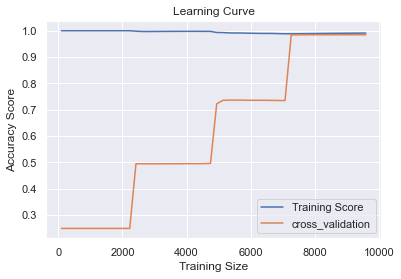

In [84]:
plt.plot(train_sizes, train_mean, label = 'Training Score')
plt.plot(train_sizes, test_mean,label = 'cross_validation')

#plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, color= '#DDDDDD')
#plt.fill_between(train_sizes, test_mean-test_std, test_mean+test_std, color= '#DDDDDD')

plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
plt.title('Learning Curve')
plt.legend(loc = 'best')

In [85]:
print(model)

['SVC', 'GaussianNB', 'DTC', 'KNeighborsClassifier']


In [86]:
print(acc)

[0.9988737679359458, array([1.        , 0.99812383, 0.99812383, 0.99906191, 1.        ,
       0.99906103, 1.        , 0.99812207, 0.99906103, 1.        ]), 0.9989677527327819, 0.9904269393723188]


<Figure size 2000x500 with 0 Axes>

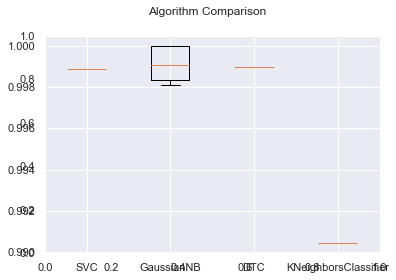

In [87]:
plt.figure(figsize=[20, 5], dpi=100)
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
ax = fig.add_subplot(111)
plt.boxplot(acc)
ax.set_xticklabels(model)
#ay.set_yticklabels(acc)
plt.show()

In [33]:
#pickle.dump(clf,open('DTmodel.pkl','wb'))

In [34]:
#pickle.dump(svclassifier,open('SVMmodel.pkl','wb'))

In [35]:
#pickle.dump(gnb,open('GNBmodel.pkl','wb'))

In [36]:
#pickle.dump(gnb,open('KNNmodel.pkl','wb'))

In [37]:
import altair as alt
import pandas as pd

dummy = pd.DataFrame({'Models Comparison':['NB','DT', 'SVM','KNN'],'Algorithm':['NB','DT','SVM','KNN'],'Accuracy':[10,8,6,4]})
alt.Chart(dummy).transform_calculate(
    key="datum.Algorithm == 'c'", 
).transform_joinaggregate(
    sort_key="argmax(key)", groupby=['Models Comparison']
).transform_calculate(
    sort_val='datum.sort_key.Accuracy'  
).mark_bar().encode(
    x=alt.X('Algorithm:O', axis=alt.Axis(title=None, labels=False, ticks=True)),
    y=alt.Y('Accuracy:Q', axis=alt.Axis(grid=False)),
    column=alt.Column('Models Comparison:N', sort=alt.SortField("sort_val", order="descending")),
    color='Algorithm',
)

alt.Chart(...)

In [38]:
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# prepare models
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))


In [39]:
# Application of all Machine Learning methods
MLA = []


KNN: 0.999179 (0.001488)
DT: 1.000000 (0.000000)
NB: 1.000000 (0.000000)
SVM: 1.000000 (0.000000)


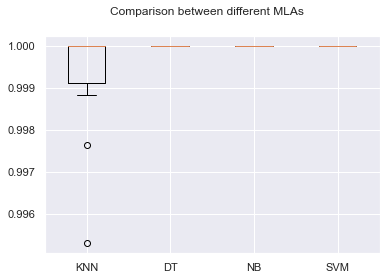

In [40]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=None)
	cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Comparison between different MLAs')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


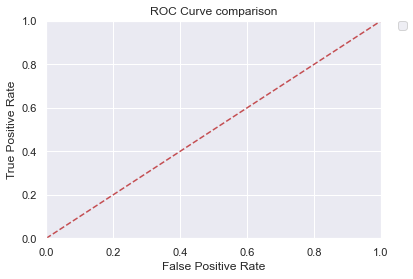

In [41]:
# Creating plot to show the ROC for all MLA
index = 1
for alg in MLA:
    
    
    predicted = alg.fit(x_train, y_train).predict(x_test)
    fp, tp, th = roc_curve(y_test, predicted)
    roc_auc_mla = auc(fp, tp)
    MLA_name = alg.__class__.__name__
    plt.plot(fp, tp, lw=2, alpha=0.3, label='ROC %s (AUC = %0.2f)'  % (MLA_name, roc_auc_mla))
   
    index+=1

plt.title('ROC Curve comparison')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')    
plt.show()

KNN: 0.999179 (0.001488)
DT: 1.000000 (0.000000)
NB: 1.000000 (0.000000)
SVM: 1.000000 (0.000000)


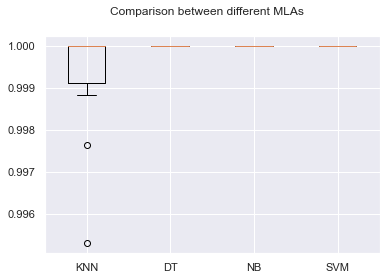

In [42]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10)
	cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Comparison between different MLAs')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

NameError: name 'MLA_compare' is not defined

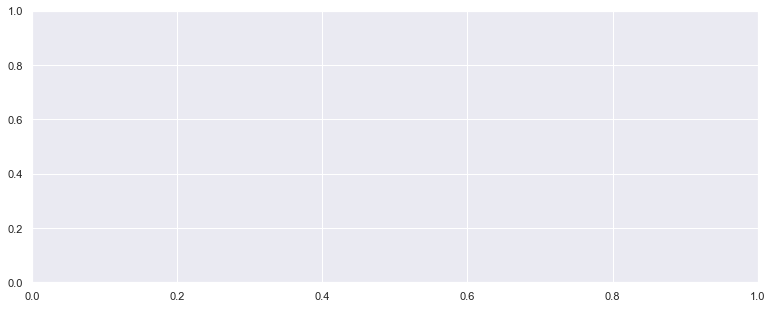

In [43]:
# Creating plot to show the train accuracy
plt.subplots(figsize=(13,5))
sns.barplot(x="MLA used", y="Train Accuracy",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Train Accuracy Comparison')
plt.show()

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [ ]:
h = 0.02  # step size in the mesh

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "Gaussian Process",
    "Decision Tree",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    MLPClassifier(alpha=1, max_iter=1000),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            xx.max() - 0.3,
            yy.min() + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()

In [ ]:
results = []
names = []
scoring = 'accuracy'
for name, model in models:
         kfold = model_selection.KFold(n_splits=10)
         cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
         results.append(cv_results)
         names.append(name)
         msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
         print(msg)

In [ ]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('How to compare sklearn classification algorithms')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
import altair as alt
import pandas as pd

dummy = pd.DataFrame({'Models Comparison':['SVM','KNN', 'NB','DT'],'Algorithm':['SVM','KNN','NB','DT'],'Accuracy':[5,2,3,4]})
alt.Chart(dummy).transform_calculate(
    key="datum.Algorithm == 'c'", 
).transform_joinaggregate(
    sort_key="argmax(key)", groupby=['Models Comparison']
).transform_calculate(
    sort_val='datum.sort_key.Accuracy'  
).mark_bar().encode(
    x=alt.X('Algorithm:O', axis=alt.Axis(title=None, labels=False, ticks=True)),
    y=alt.Y('Accuracy:Q', axis=alt.Axis(grid=False)),
    column=alt.Column('Models Comparison:N', sort=alt.SortField("sort_val", order="descending")),
    color='Algorithm',
)

In [44]:
results = []
names = []
scoring = 'precision'
for name, model in models:
         kfold = model_selection.KFold(n_splits=10)
         cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
         results.append(cv_results)
         names.append(name)
         msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
         print(msg)

KNN: nan (nan)
DT: nan (nan)
NB: nan (nan)
SVM: nan (nan)


In [45]:
results = []
names = []
scoring = 'f1'
for name, model in models:
         kfold = model_selection.KFold(n_splits=10)
         cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
         results.append(cv_results)
         names.append(name)
         msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
         print(msg)

KNN: nan (nan)
DT: nan (nan)
NB: nan (nan)
SVM: nan (nan)


In [46]:
results = []
names = []
scoring = 'recall'
for name, model in models:
         kfold = model_selection.KFold(n_splits=10)
         cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
         results.append(cv_results)
         names.append(name)
         msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
         print(msg)

KNN: nan (nan)
DT: nan (nan)
NB: nan (nan)
SVM: nan (nan)


In [47]:
import altair as alt
import pandas as pd

dummy = pd.DataFrame({'Models Comparison':['SVM','KNN', 'NB','DT'],'Algorithm':['SVM','KNN','NB','DT'],'Accuracy':[5,2,3,4]})
alt.Chart(dummy).transform_calculate(
    key="datum.Algorithm == 'c'", 
).transform_joinaggregate(
    sort_key="argmax(key)", groupby=['Models Comparison']
).transform_calculate(
    sort_val='datum.sort_key.Accuracy'  
).mark_bar().encode(
    x=alt.X('Algorithm:O', axis=alt.Axis(title=None, labels=False, ticks=True)),
    y=alt.Y('Accuracy:Q', axis=alt.Axis(grid=False)),
    column=alt.Column('Models Comparison:N', sort=alt.SortField("sort_val", order="descending")),
    color='Algorithm',
)

alt.Chart(...)

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import RocCurveDisplay
from sklearn.datasets import load_wine

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
svc = SVC(random_state=42)
svc.fit(X_train, y_train)

svc_disp = RocCurveDisplay.from_estimator(svc, X_test, y_test)

ValueError: Expected 'estimator' to be a binary classifier, but got SVC fit on multiclass (4 classes) data

In [ ]:
from sklearn import linear_model
svclassifier = SVC
SVC.fit(X, y)
plt.plot(X, y, 'o')
plt.plot(X_test, SVC.predict(X_test))

In [ ]:
for name, model in models:
    
        kfold = KFold(n_splits = 10)
        cv_results = cross_val_score(model, X, y, cv = 10, scoring= "accuracy")
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

In [ ]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10)
	cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Comparison between different MLAs')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
for name, model in models:
    
        kfold = KFold(n_splits = 10)
        cv_results = cross_val_score(model, X, y, cv = 10, scoring= "accuracy")
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
import altair as alt
import pandas as pd

dummy = pd.DataFrame({'Models Comparison':['NB','DT', 'SVM','KNN'],'Algorithm':['SVM','KNN','NB','DT'],'Accuracy':[4,3,2.5,2]})
alt.Chart(dummy).transform_calculate(
    key="datum.Algorithm == 'c'", 
).transform_joinaggregate(
    sort_key="argmax(key)", groupby=['Models Comparison']
).transform_calculate(
    sort_val='datum.sort_key.Accuracy'  
).mark_bar().encode(
    x=alt.X('Algorithm:O', axis=alt.Axis(title=None, labels=False, ticks=True)),
    y=alt.Y('Accuracy:Q', axis=alt.Axis(grid=False)),
    column=alt.Column('Models Comparison:N', sort=alt.SortField("sort_val", order="descending")),
    color='Algorithm',
)

In [ ]:
param_range = np.arange(1, 250, 2)

train_scores, test_scores = validation_curve(SVC(),
                                  X, y, param_name="n_estimators", param_range=param_range,
                                  cv=10, scoring="accuracy", n_jobs=-1)

In [ ]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

In [ ]:
DT = DecisionTreeClassifier()
print(); print(cross_val_score(DT, X, y, scoring="accuracy", cv = 10))
mean_score = cross_val_score(DT, X, y, scoring="accuracy", cv = 10).mean()
std_score = cross_val_score(DT, X, y, scoring="accuracy", cv = 10).std()
print(mean_score)
print(std_score)

In [ ]:
diabetes_data.plot()

<AxesSubplot:>

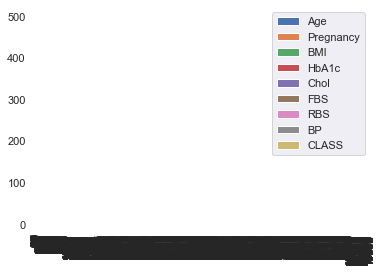

In [163]:
diabetes_data.plot(kind="bar")

<AxesSubplot:>

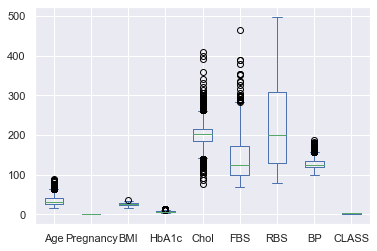

In [164]:
diabetes_data.plot.box()

In [168]:
from sklearn.metrics import confusion_matrix,accuracy_score,make_scorer
from sklearn.model_selection import cross_validate

def tn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 0]
def fp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 1]
def fn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 0]
def tp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 1]

#cross validation purpose
scoring = {'accuracy': make_scorer(accuracy_score),'prec': 'precision'}
scoring = {'tp': make_scorer(tp), 'tn': make_scorer(tn),
           'fp': make_scorer(fp), 'fn': make_scorer(fn)}

def display_result(result):
    print("TP: ",result['test_tp'])
    print("TN: ",result['test_tn'])
    print("FN: ",result['test_fn'])
    print("FP: ",result['test_fp'])

In [55]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [58]:
from flask_ngrok import run_with_ngrok
from flask import Flask

In [61]:
import pickle
pickle.dump(random, open('DTmodel.pkl','wb'))

DTmodel = pickle.load(open('DTmodel.pkl','rb'))